This notebook can preprocess any Amplification curve data (no matter singleplex or multiplex).<br>
It does:
- Background removal,
- Noisy curve removal,
- Flat amplifciation curve removal,
- Delayed curves removal.

You can also visualise the curve after each step of the processing.

# Import libraries

In [1]:
from pathlib import Path

In [2]:
import python_libraries.data_loading as loadfunc
import python_libraries.data_processing as procfunc
import python_libraries.plotting_function as plotfunc
import python_libraries.utilities as utils

In [3]:
utils.colourblind()
NMETA = 6

# Load data
First we are loading all the data in the folder for that particular experiment.<br>
Obviously even here there is a date, inside the folder there might be multiple experiments, that's why after we create a dictionary which can downselect certain exp_ids.

In [4]:
singleplex_dict = {0: '20210706_01',
                   1: '20210701_01'}

multiplex_dict = {0: '20210707_01',
                  1: '20210707_03',
                  2: '20210707_02',
                  3: '20210708_01',
                  4: '20210708_02',
                  5: '20210708_03',
                  6: '20210715_01',
                  7: '20210715_02',
                  8: '20210721_02',
                  9: '20210721_03',
                 10: '20210722_01',
                 11: '20210723_01',
                 12: '20210723_02',
                 13: '20210728_02',
                 14: '20210803_03',
                 15: '20210701_02'}

DATA_TYPE = 'singleplex'
# DATA_TYPE = 'multiplex'

In [5]:
data_selected_path = 'data'

Here we are passing the Key of the dictionary which corrisponds to a certain experiment ID.<br>
The data can be loaded from both Singleplex and Multiplex.<br>
The function "load_raw_data_by_expid( )", will take the path of the data and the list of seleceted exp_ids, to downselect them from the entire datafile.

In [6]:
id_key = [0]

exp_id_list = []

if DATA_TYPE == 'singleplex':
    exp_id_list = utils.list_from_key(singleplex_dict, id_key)

if DATA_TYPE == 'multiplex':
    exp_id_list = utils.list_from_key(multiplex_dict, id_key)
    
df_raw_temp = loadfunc.load_raw_data_by_expid(data_selected_path, exp_id_list, DATA_TYPE)
df_raw_temp = utils.order_columns(df_raw_temp, NMETA)
print(f'Data shape: {df_raw_temp.shape}')
df_raw_temp

Data shape: (36960, 51)


,Channel,PrimerMix,Target,Assay,Conc,Exp_ID,1.0,2.0,3.0,4.0,...,36.0,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,45.0
0,panel01,singleplex,ADE,ADE_HEX_03,100000.0,20210706_01,0.208161,0.208374,0.210686,0.213625,...,1.709039,1.733775,1.761069,1.784854,1.803621,1.822094,1.836782,1.850766,1.864648,1.875645
1,panel01,singleplex,ADE,ADE_HEX_03,100000.0,20210706_01,0.208027,0.209472,0.211341,0.214045,...,1.522617,1.570357,1.613515,1.650223,1.685710,1.717179,1.747026,1.773784,1.791937,1.801574
2,panel01,singleplex,ADE,ADE_HEX_03,100000.0,20210706_01,0.210392,0.210596,0.212346,0.215433,...,1.521087,1.569142,1.612460,1.651067,1.687655,1.716937,1.741553,1.766984,1.788464,1.802715
3,panel01,singleplex,ADE,ADE_HEX_03,100000.0,20210706_01,0.207429,0.209073,0.210939,0.213164,...,1.572575,1.613919,1.650423,1.684444,1.710201,1.732271,1.757073,1.782234,1.803925,1.819096
4,panel01,singleplex,ADE,ADE_HEX_03,100000.0,20210706_01,0.208516,0.210684,0.213173,0.215666,...,1.594987,1.634742,1.672018,1.704530,1.733193,1.758635,1.781338,1.804596,1.825010,1.838519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36955,panel48,singleplex,MER,MER_N_04,100000.0,20210706_01,0.181550,0.181671,0.182270,0.183132,...,2.403457,2.443008,2.477810,2.503335,2.520073,2.536816,2.548447,2.560385,2.570689,2.575484
36956,panel48,singleplex,MER,MER_N_04,100000.0,20210706_01,0.182152,0.182529,0.183597,0.184928,...,2.435974,2.476939,2.511430,2.527255,2.542288,2.548940,2.554306,2.564433,2.573928,2.578138
36957,panel48,singleplex,MER,MER_N_04,100000.0,20210706_01,0.180091,0.179970,0.180401,0.181326,...,2.402300,2.437994,2.468836,2.495215,2.515874,2.527881,2.536687,2.545991,2.554926,2.561260
36958,panel48,singleplex,MER,MER_N_04,100000.0,20210706_01,0.181539,0.181535,0.181938,0.182378,...,2.410265,2.447662,2.478426,2.504252,2.522541,2.533943,2.542780,2.553695,2.561288,2.567104


## down-selection (remove ntc or conc no needed)

In [7]:
if DATA_TYPE == 'singleplex':
    df_raw = utils.data_downselection(df_raw_temp, 'Conc', [1e5], keep = True)
    df_raw

if DATA_TYPE == 'multiplex':
    df_raw = utils.data_downselection(df_raw_temp, 'Target', ['Water'], keep = False)
    df_raw

# Data preprocessing

## Remove background

In [10]:
df_raw_rb = procfunc.remove_background(df_raw, NMETA, ct_start=3, ct_skip=5)
print(f'original df_shape: {df_raw.shape}')
print(f'remove background df_shape: {df_raw_rb.shape}')

original df_shape: (36960, 51)
remove background df_shape: (36960, 51)


## Remove unamplified curve

In [11]:
FLUO_THRESH = 0.4
CT_RANGE = [46, 51]

df_raw_rb_filtered = df_raw_rb[(df_raw_rb.iloc[:, CT_RANGE[0] : CT_RANGE[1]] > FLUO_THRESH).all(axis = 'columns')]
print(f'remove background df_shape: {df_raw_rb.shape}')
print(f'remove background + filtered late: {df_raw_rb_filtered.shape}')

remove background df_shape: (36960, 51)
remove background + filtered late: (36318, 51)


## Remove late amplification curves

In [12]:
FFI_THRESH = 0.2  # if thresh=0.1 this is 10% of the FFI value at the max cycle value
CT_THRESH = 30

remove_delayed_ac = procfunc.remove_delay_ac(df_raw_rb_filtered, NMETA, FFI_THRESH, CT_THRESH)
print(f'remove background + filtered late: {df_raw_rb_filtered.shape}')
print(f'remove background + filtered flat + filtered late: {remove_delayed_ac.shape}')

remove background + filtered late: (36318, 51)
remove background + filtered flat + filtered late: (35884, 51)


## Remove noisy data

In [13]:
df_filtered = procfunc.remove_noisy_data(remove_delayed_ac, NMETA, THRESH=13, panel_remove=False, plot=False)
print(f'remove background + filtered flat + filtered late: {remove_delayed_ac.shape}')
print(f'remove background + filtered flat + filtered late + noisy data: {df_filtered.shape}')

remove background + filtered flat + filtered late: (35884, 51)
remove background + filtered flat + filtered late + noisy data: (35884, 51)


In [14]:
# SAVING
loadfunc.store_by_id(df_filtered.reset_index(drop=True), data_selected_path, 'processed_data', 'raw_rb')

In [15]:
df_filtered.head(3)

,Channel,PrimerMix,Target,Assay,Conc,Exp_ID,1.0,2.0,3.0,4.0,...,36.0,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,45.0
0,panel01,singleplex,ADE,ADE_HEX_03,100000.0,20210706_01,-0.013272,-0.013059,-0.010748,-0.007808,...,1.487606,1.512341,1.539635,1.563420,1.582187,1.600661,1.615349,1.629333,1.643214,1.654212
1,panel01,singleplex,ADE,ADE_HEX_03,100000.0,20210706_01,-0.013221,-0.011776,-0.009906,-0.007202,...,1.301370,1.349110,1.392268,1.428976,1.464463,1.495932,1.525779,1.552536,1.570690,1.580326
2,panel01,singleplex,ADE,ADE_HEX_03,100000.0,20210706_01,-0.012398,-0.012193,-0.010444,-0.007357,...,1.298298,1.346353,1.389671,1.428277,1.464866,1.494147,1.518763,1.544194,1.565675,1.579926


# VISUALIZATION CHECK POINT

## Plotting RAW curves

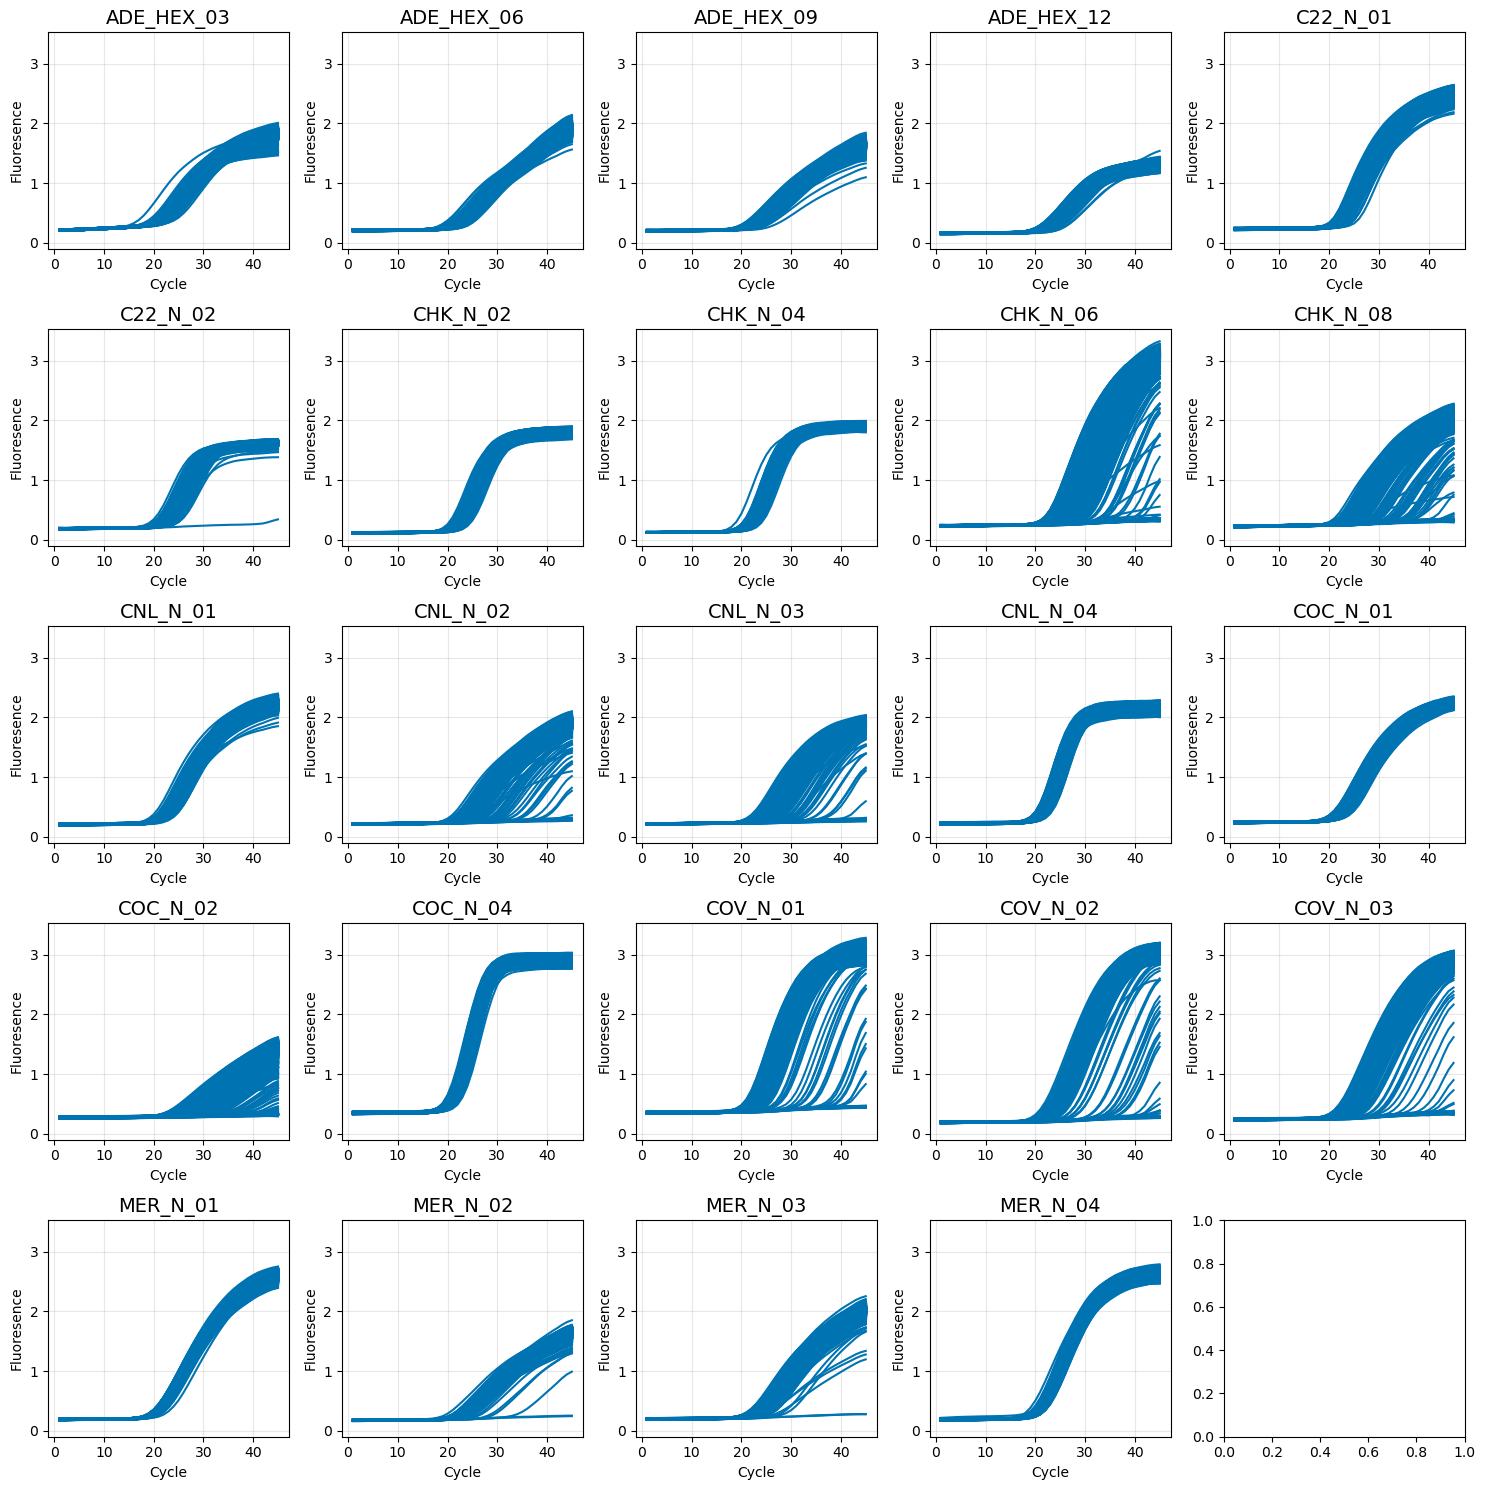

In [16]:
# if you want to visualise raw_curves
RAW = True

if RAW:
    plotfunc.curve_plot_by(df_raw_temp, NMETA, by_column='Assay', col_number=5,
                           size=(15, 15), title_font=14)

## Plotting filtered RAW curves

SINGLEPLEX CURVES


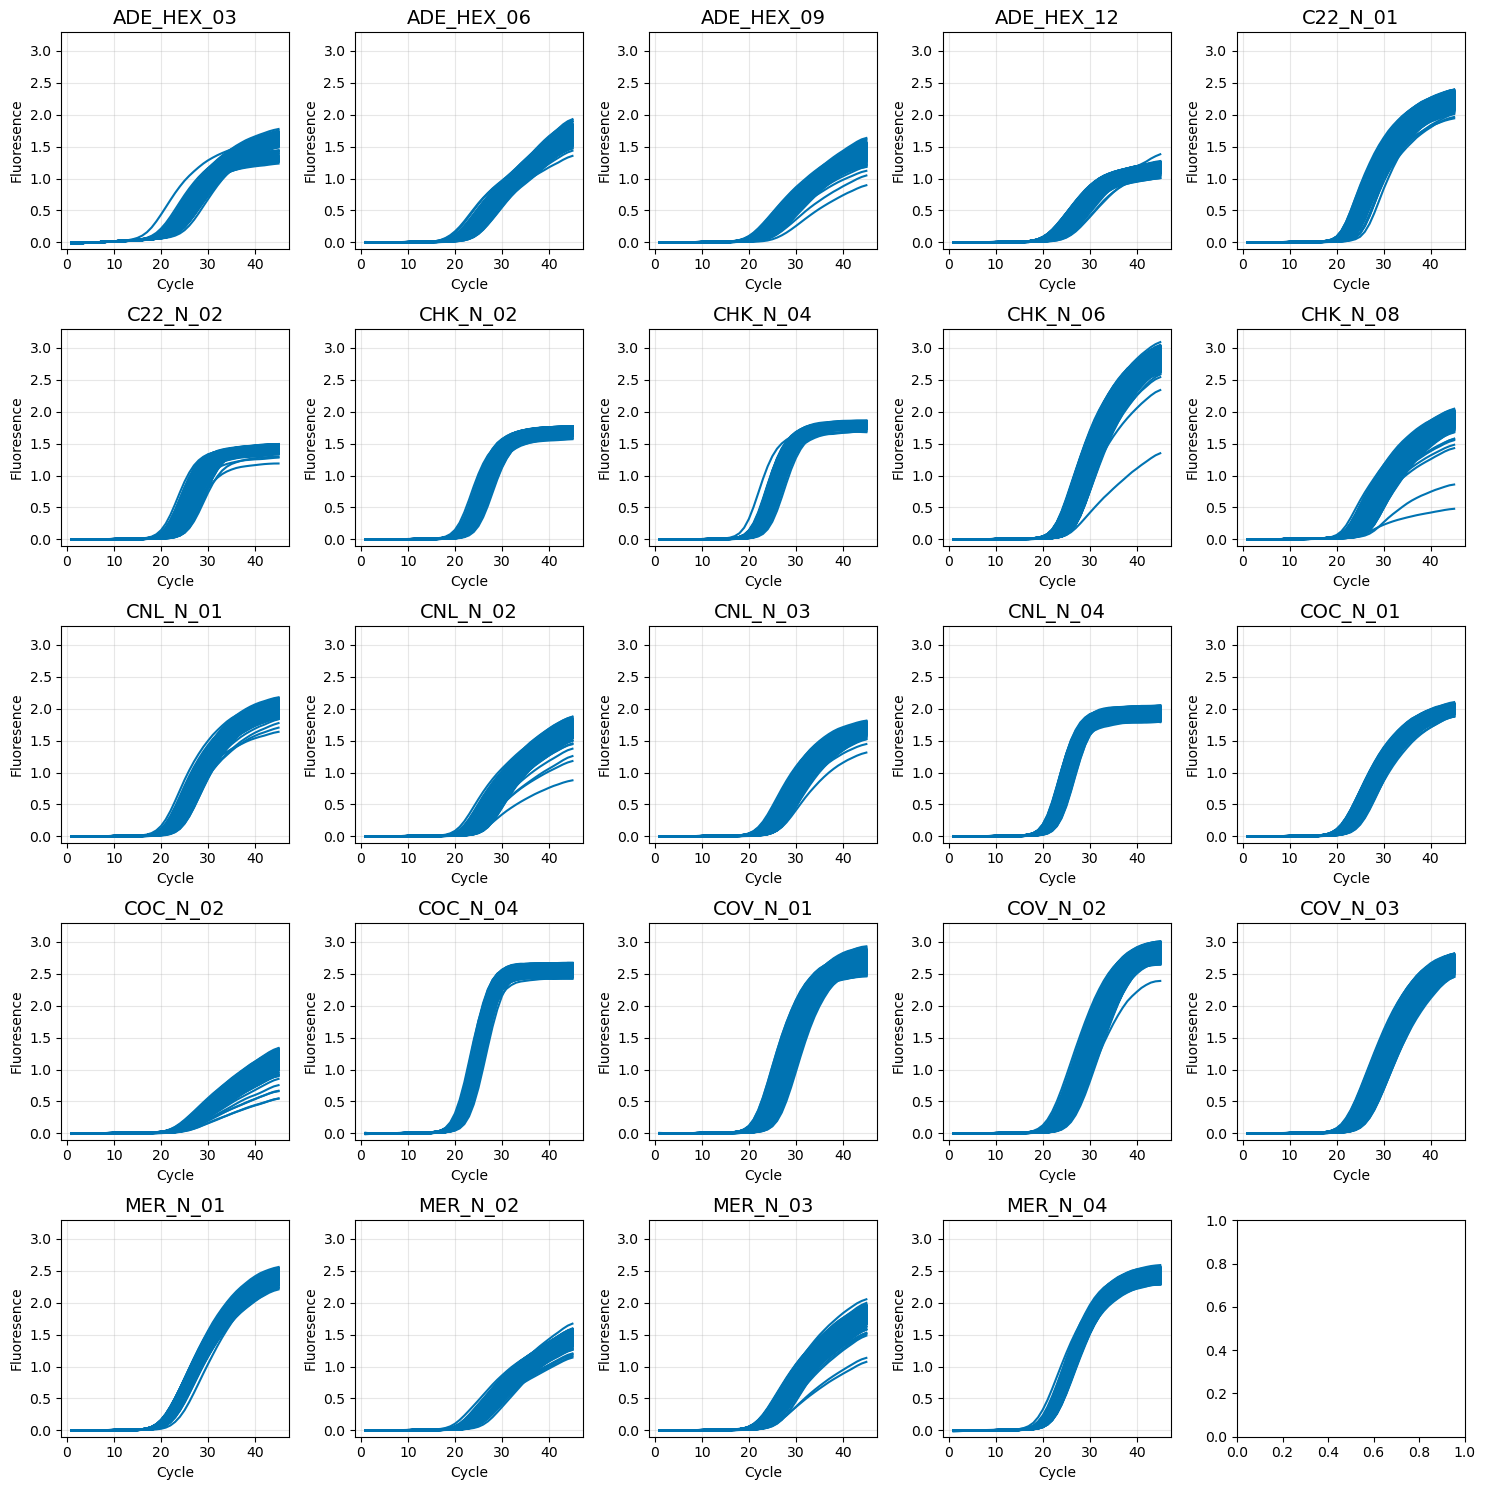

In [17]:
if DATA_TYPE == 'singleplex':
    print('SINGLEPLEX CURVES')
    
if DATA_TYPE == 'multiplex':
    print('MULTIPLEX CURVES')
    
plotfunc.curve_plot_by(df_filtered, NMETA, by_column='Assay', col_number=5,
                       size=(15, 15), title_font=14)